In [1]:
from gurobipy import *
import numpy as np
import networkx as nx
import math
import random
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
X = int(input("Enter number of nodes: "))

Enter number of nodes: 6


In [3]:
def MyBipartiteGraph(X):
    vertices = [u for u in range(X)]
    k = random.randint (1,X-1)#  so the subset can have min 1 or max X-1 number
    u=random.sample(vertices, k)
    v=list(set(vertices)- set(u))
    edges=[]
    G = nx.Graph()
    for i in vertices:
        G.add_node(i)
        if i in u:
            k=u
            l=v
        else:
            k=v
            l=u
        length=len(l)
        k1 = random.randint (1,length)
        for j in range (k1):
            l1=random.randint (0,length-1)
            l2=l[l1]
            l3=vertices[i]
            if l3>l2:
                l2,l3=l3,l2
                
            item=(l2,l3)
            w=random.randint (1,10)
            if item not in edges:
                edges.append(item)
                G.add_edge(l2,l3,weight=w)
    
    
   
    return G    
    
    

In [4]:
G=MyBipartiteGraph(X)
G1=G

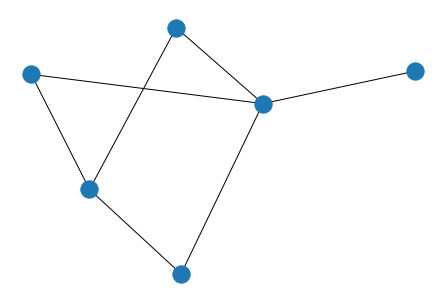

In [5]:
nx.draw(G)

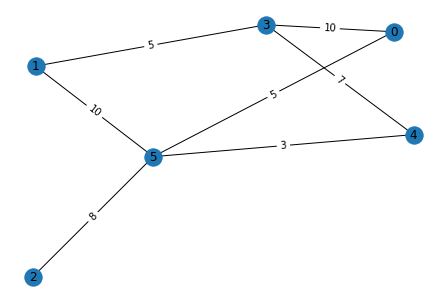

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [7]:
labels

{(0, 5): 5, (0, 3): 10, (5, 1): 10, (5, 2): 8, (5, 4): 3, (1, 3): 5, (3, 4): 7}

In [8]:

print(bipartite.is_bipartite(G))

True


In [9]:
g1=nx.to_numpy_matrix(G)

In [10]:
g1

matrix([[ 0.,  5.,  0., 10.,  0.,  0.],
        [ 5.,  0., 10.,  0.,  8.,  3.],
        [ 0., 10.,  0.,  5.,  0.,  0.],
        [10.,  0.,  5.,  0.,  0.,  7.],
        [ 0.,  8.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  7.,  0.,  0.]])

In [11]:
edges = list(G.edges())
adjList = [[] for _ in range(X)]
for (src, dest) in edges:
    adjList[src].append(dest)
    adjList[dest].append(src)

In [12]:
adjList

[[5, 3], [5, 3], [5], [0, 1, 4], [5, 3], [0, 1, 2, 4]]

In [13]:
def color(G):
    if G.is_directed():
        import itertools

        def neighbors(v):
            return itertools.chain.from_iterable([G.predecessors(v),
                                                  G.successors(v)])
    else:
        neighbors = G.neighbors

    color = {}
    for n in G:  # handle disconnected graphs
        if n in color or len(G[n]) == 0:  # skip isolates
            continue
        queue = [n]
        color[n] = 1  # nodes seen with color (1 or 0)
        while queue:
            v = queue.pop()
            c = 1 - color[v]  # opposite color of node v
            for w in neighbors(v):
                if w in color:
                    if color[w] == color[v]:
                        raise nx.NetworkXError("Graph is not bipartite.")
                else:
                    color[w] = c
                    queue.append(w)
    # color isolates with 0
    color.update(dict.fromkeys(nx.isolates(G), 0))
    return color

In [14]:
def is_bipartite(G):
    try:
        color(G)
        return True
    except nx.NetworkXError:
        return False

In [15]:
is_bipartite(G)

True

In [16]:
m = Model()
edges = list(G.edges())

# variables
#edge_cover = []
#for u in edges:
    #edge_cover.append(m.addVar(lb=0, ub=1, vtype=GRB.BINARY))
    
edge_cover = []
for i in range(len(edges)):
    v= m.addVar(lb=0, ub=1,vtype=GRB.BINARY,name=str(i))
    edge_cover.append(v)
    



Using license file /Users/madhusmitakalita/gurobi.lic
Academic license - for non-commercial use only


In [17]:
edges = list(G.edges()) # get the list of edges in graph G
M = [[0 for j in range(X)] for i in range(len(edges))] # creat a helper matrix
for i in range(len(edges)):
    edge = edges[i]
    u = edge[0]
    v = edge[1]
    M[i][u] = 1
    M[i][v] = 1


In [18]:
#adding the constraint
for j in range(X):
    const=0
    for i in range(len(edge_cover)):
        const+=M[i][j]*edge_cover[i]
    m.addConstr(const<=1)

In [19]:
 a= list(labels.values())

In [20]:
# objective
cardinality = 0
for i in range(len(edges)):
    b=edge_cover[i]
    cardinality += b*a[i]
m.setObjective(cardinality, GRB.MAXIMIZE)

In [21]:
m.optimize()

Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 6 rows, 7 columns and 14 nonzeros
Model fingerprint: 0xe88dfd63
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 10.0000000
Presolve removed 6 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 2: 20 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+01, best bound 2.000000000000e+01, gap 0.0000%


In [22]:
edge_cover

[<gurobi.Var 0 (value 0.0)>,
 <gurobi.Var 1 (value 1.0)>,
 <gurobi.Var 2 (value 1.0)>,
 <gurobi.Var 3 (value 0.0)>,
 <gurobi.Var 4 (value 0.0)>,
 <gurobi.Var 5 (value 0.0)>,
 <gurobi.Var 6 (value 0.0)>]

In [23]:
g=[]
for v in m.getVars():
        e=v.x
        if e==1:
            g.append(v.varName)

In [24]:
print(" the edges are after optimization are:")
print(g)

 the edges are after optimization are:
['1', '2']


In [25]:

print("optimal value: " ,m.objVal)

optimal value:  20.0


In [26]:
for i in range(0, len(g)): 
    g[i] = int(g[i])


In [27]:
edge_new=[]
for i in g:
    edge_new.append(edges[i])

In [28]:
edge_new

[(0, 3), (5, 1)]

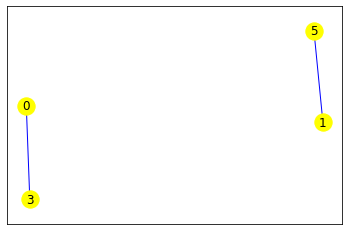

<Figure size 7200x3600 with 0 Axes>

In [29]:
G = nx.Graph()
G.add_edges_from(edge_new)
random_pos = nx.random_layout(G, seed=30)
pos = nx.spring_layout(G,k=0.10,iterations=20,pos=random_pos)
nx.draw_networkx_nodes(G, pos,node_color = 'yellow')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='blue')
p=plt.figure(figsize=(100,50))


